In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

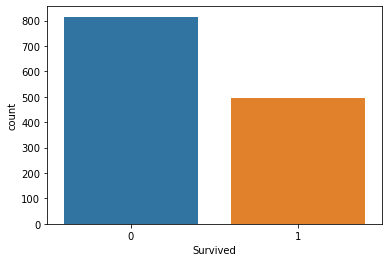

In [37]:
sns.countplot(x = "Survived", data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

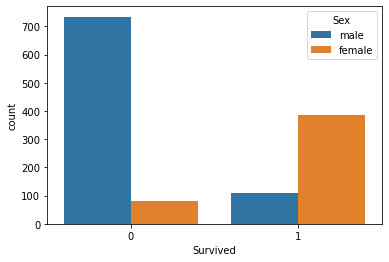

In [38]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

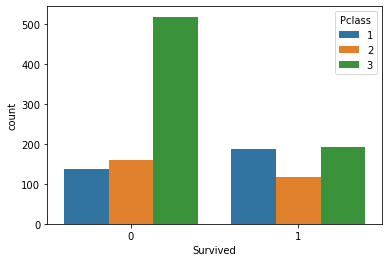

In [39]:
sns.countplot(x = "Survived", hue = "Pclass", data = titanic)

<AxesSubplot:ylabel='Frequency'>

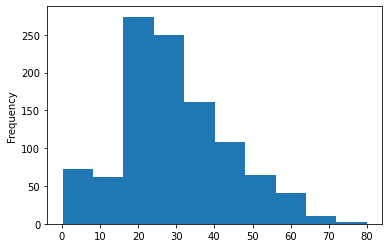

In [7]:
titanic['Age'].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

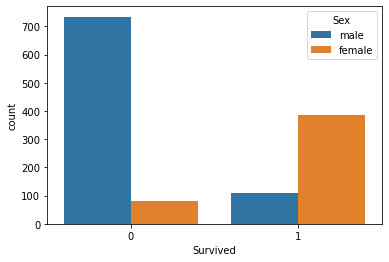

In [40]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

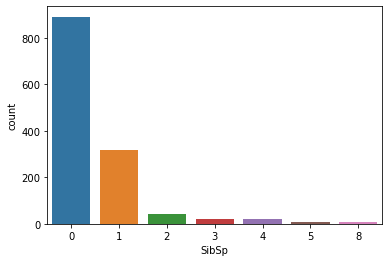

In [41]:
sns.countplot(x = 'SibSp', data = titanic)

In [10]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

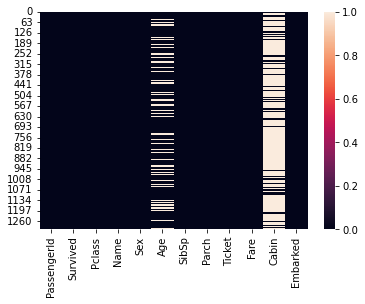

In [11]:
sns.heatmap(titanic.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

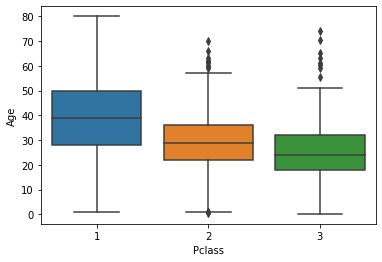

In [42]:
sns.boxplot(x = "Pclass", y = "Age", data = titanic)

In [43]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [44]:
titanic.dropna(inplace = True)

<AxesSubplot:>

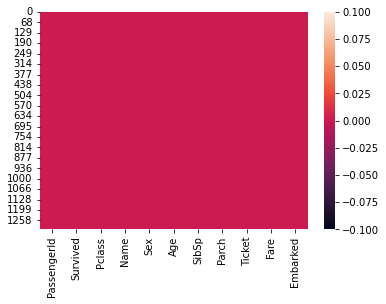

In [15]:
sns.heatmap(titanic.isnull())

In [16]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
pd.get_dummies(titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1300,1,0
1302,1,0
1303,1,0
1305,1,0


In [45]:
gender = pd.get_dummies(titanic['Sex'], drop_first = True)

In [19]:
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [46]:
Embarked = pd.get_dummies(titanic['Embarked'], drop_first = True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [47]:
titanic = pd.concat([titanic, gender, Embarked], axis = 1)

In [48]:
titanic.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [49]:
titanic.drop('Pclass', axis = 1, inplace = True)

titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [50]:
x = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [54]:
logmodel.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_predict = logmodel.predict(x_test)

In [56]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       180\n           1       0.81      0.75      0.78       133\n\n    accuracy                           0.82       313\n   macro avg       0.82      0.81      0.81       313\nweighted avg       0.82      0.82      0.82       313\n'

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[157,  23],
       [ 33, 100]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8210862619808307